# SMS Spam Classifier

You can download the dataset from kaggle : https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA (Exploratory Data Analysis)

In [3]:
df['label'].value_counts() # checking the no. of spam and ham present in the dataset

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
df.isnull().sum() # No NaN values in the dataset

label      0
message    0
dtype: int64

In [5]:
df.columns

Index(['label', 'message'], dtype='object')

In [6]:
# converting the labels into 1 and 0 ..for spam = 1 , ham =0
df['label'] = pd.get_dummies(df['label'],drop_first=True)

In [7]:
df['label'].head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: uint8

<AxesSubplot:xlabel='label', ylabel='count'>

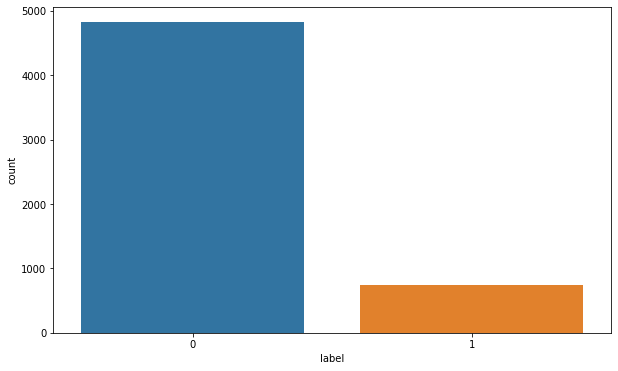

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df)

### Note : we can clearly see that from the above plot our dataset is imbalanced !

## Feature Engineering

- Since our dataset is imbalanced so lets handle with oversampling techniques!

In [9]:
print('The number of spam messages in dataset : {}'.format(len(df[df['label']==1])))
print('The number of ham messages in dataset : {}'.format(len(df[df['label']==0])))

The number of spam messages in dataset : 747
The number of ham messages in dataset : 4825


In [10]:
import re
import nltk
# nltk.download('stopwords')

In [11]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [13]:
y = pd.get_dummies(df['label'],drop_first=True)

In [14]:
y.head()

,1
0,0
1,0
2,1
3,0
4,0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [30]:
y_train.value_counts()

1
0    3247
1     486
dtype: int64

In [16]:
X_train.shape , X_test.shape

((3733, 5000), (1839, 5000))

In [17]:
from sklearn.naive_bayes import MultinomialNB
mb  =  MultinomialNB()
mb.fit(X_train,y_train)

d:\anacondafiles\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [18]:
y_pred = mb.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[1556,   22],
       [  10,  251]], dtype=int64)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1578
           1       0.92      0.96      0.94       261

    accuracy                           0.98      1839
   macro avg       0.96      0.97      0.96      1839
weighted avg       0.98      0.98      0.98      1839



<AxesSubplot:>

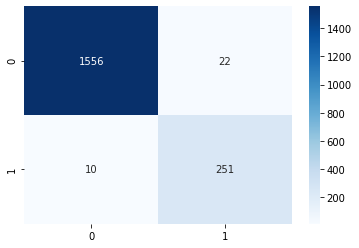

In [21]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')

# OverSampling

In [33]:
from imblearn.over_sampling import RandomOverSampler
rm =  RandomOverSampler(0.70)
X_rs , y_rs = rm.fit_sample(X,y)

d:\anacondafiles\envs\deeplearning\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [34]:
y_rs.value_counts() # Now we have handled the imbalance problem

1
0    4825
1    3377
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.33, random_state=0)

In [36]:
from sklearn.naive_bayes import MultinomialNB
mb  =  MultinomialNB()
mb.fit(X_train,y_train)

d:\anacondafiles\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [37]:
y_pred = mb.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[1524,   37],
       [  28, 1118]], dtype=int64)

<AxesSubplot:>

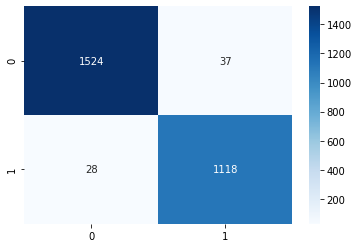

In [39]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1561
           1       0.97      0.98      0.97      1146

    accuracy                           0.98      2707
   macro avg       0.97      0.98      0.98      2707
weighted avg       0.98      0.98      0.98      2707

